In [1]:
from PIL import Image
import numpy as np
import os
from pylab import *

# Get Dataset

In [2]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.png')]

In [3]:
dataset = sorted(get_imlist('datasets/digit/'))

# Chain Code Stuff

In [4]:
X_TRANSLATOR = [1, 1, 0, -1, -1, -1, 0, 1]
Y_TRANSLATOR = [0, 1, 1, 1, 0, -1, -1, -1]

def is_border(image, x, y):
    i = 0
    while (i < 8):
        next_x = x + X_TRANSLATOR[i]
        next_y = y + Y_TRANSLATOR[i]
        
        next_pixel_color = image[next_y][next_x]
        if (next_pixel_color > 127):
            return True
        i += 2;
        
    return False

# Directions:
# |5|6|7|
# |4| |0|
# |3|2|1|
def image_chain_code(image_path):
    result = []
    
    
    image = array(Image.open(image_path).convert('L'))
    found = False
    
    # Start Pixel
    start_value = (-1, -1)
    for i, row in enumerate(image):
        for j, value in enumerate(row):
            if value <= 127:
                start_value = (j, i)
                found = True
                print(start_value)
            if found:
                break
        
        if found:
            break
    
    # Check Start Value Change
    if start_value == (-1, -1):
        return []
    else:
        maks = 0
        # ChainCode Start Here
        
        start_x = start_value[0]
        start_y = start_value[1]
        
        prev_x = -1
        prev_y = -1
        
        prev2_x = -1
        prev2_y = -1
        
        direction = 0
        
        x = start_x
        y = start_y
        
        # Outer Do While
        while True:
            i = 0
            found = False
            
            # Inner Do While
            while True:
                
                next_dir = (direction + i) % 8
            
                next_x = x + X_TRANSLATOR[next_dir]
                next_y = y + Y_TRANSLATOR[next_dir]
                
                if ((next_x != prev_x or next_y != prev_y) and (next_x != prev2_x or next_y != prev2_y)):
                    next_pixel_color = image[next_y][next_x]
                    if (next_pixel_color <= 127 and is_border(image, next_x, next_y)):
                        direction = next_dir
                        result.append(direction)

#                         maks += 1
#                         if maks > 1000:
#                             return result

                        prev2_x = prev_x
                        prev2_y = prev_y
    
                        prev_x = x
                        prev_y = y
                        x = next_x
                        y = next_y
                        found = True
                    else:
                        i += 1
                else:
                    i += 1
                
                if found or i >= 8:
                    break
                            
            if i >= 8 or (x == start_x and y == start_y):
                break
        
        return result

In [5]:
def image_chain_code_histogram(image_path):
    """
    Return list of chaincode histogram
    """
    chain_code = image_chain_code(image_path)
    result = [0, 0, 0, 0, 0, 0, 0, 0]
    
    for code in chain_code:
        result[code] += 1
        
    return result

def normalize(X):
    for i, row in enumerate(X):
        sum = 0
        for value in row:
            sum += value

        for j, value in enumerate(row):
            X[i][j] = value / sum
    return X

In [6]:
dataset

['datasets/digit/0.png',
 'datasets/digit/1.png',
 'datasets/digit/2.png',
 'datasets/digit/3.png',
 'datasets/digit/4.png',
 'datasets/digit/5.png',
 'datasets/digit/6.png',
 'datasets/digit/7.png',
 'datasets/digit/8.png',
 'datasets/digit/9.png']

In [7]:
result = image_chain_code(dataset[9])

(34, 15)


In [8]:
x = [34]
y = [15]

In [9]:
for i in result:
    x.append(x[len(x) - 1] + X_TRANSLATOR[i])
    y.append(y[len(y) - 1] + Y_TRANSLATOR[i])

In [10]:
np.array(result).shape

(322,)

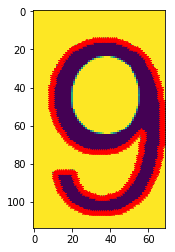

In [11]:
im = array(Image.open(dataset[9]).convert('L'))

imshow(im)

plot(x,y,'r*')
show()

# Convert Each Dataset

## Create Dataset With Histogram

In [12]:
X = []
y = []

In [13]:
i = 0
for file_path in dataset:
    X.append(image_chain_code_histogram(file_path))
    y.append(i)
    i += 1

(31, 15)
(40, 14)
(34, 14)
(31, 15)
(44, 15)
(18, 16)
(36, 15)
(9, 15)
(34, 15)
(34, 15)


In [14]:
X

[[23, 17, 57, 17, 23, 17, 57, 17],
 [12, 0, 90, 12, 19, 1, 81, 20],
 [71, 15, 42, 51, 85, 11, 36, 61],
 [61, 35, 53, 38, 60, 37, 50, 39],
 [19, 1, 87, 1, 59, 1, 47, 41],
 [90, 27, 63, 31, 85, 28, 66, 27],
 [45, 30, 54, 32, 46, 27, 59, 30],
 [57, 0, 55, 34, 52, 1, 58, 30],
 [31, 26, 39, 26, 30, 26, 40, 25],
 [45, 27, 59, 30, 45, 29, 55, 32]]

In [15]:
X = normalize(X)
X

[[0.10087719298245613,
  0.07456140350877193,
  0.25,
  0.07456140350877193,
  0.10087719298245613,
  0.07456140350877193,
  0.25,
  0.07456140350877193],
 [0.05106382978723404,
  0.0,
  0.3829787234042553,
  0.05106382978723404,
  0.08085106382978724,
  0.00425531914893617,
  0.3446808510638298,
  0.0851063829787234],
 [0.19086021505376344,
  0.04032258064516129,
  0.11290322580645161,
  0.13709677419354838,
  0.22849462365591397,
  0.02956989247311828,
  0.0967741935483871,
  0.1639784946236559],
 [0.16353887399463807,
  0.0938337801608579,
  0.14209115281501342,
  0.10187667560321716,
  0.16085790884718498,
  0.09919571045576407,
  0.13404825737265416,
  0.10455764075067024],
 [0.07421875,
  0.00390625,
  0.33984375,
  0.00390625,
  0.23046875,
  0.00390625,
  0.18359375,
  0.16015625],
 [0.2158273381294964,
  0.06474820143884892,
  0.1510791366906475,
  0.07434052757793765,
  0.2038369304556355,
  0.0671462829736211,
  0.15827338129496402,
  0.06474820143884892],
 [0.13931888544891

In [16]:
y

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [19]:
predicted = knn.predict(X)
predicted

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

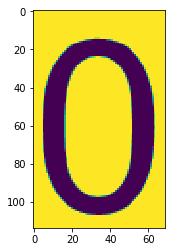

[0]


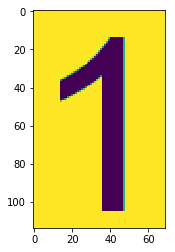

[1]


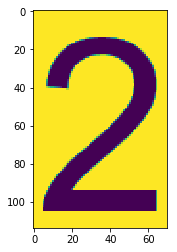

[2]


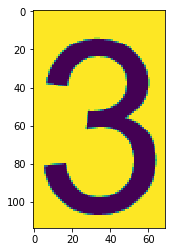

[3]


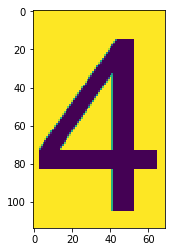

[4]


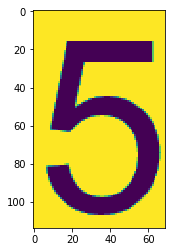

[5]


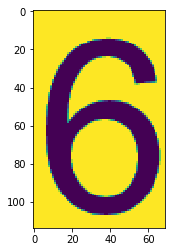

[6]


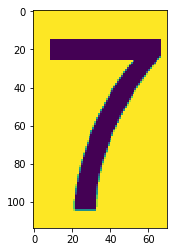

[7]


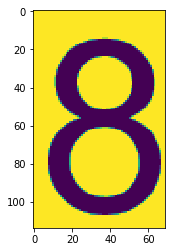

[8]


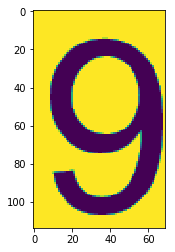

[9]


In [20]:
for index, histogram in enumerate(X):
    figure(index)
    imshow(array(Image.open(dataset[index]).convert('L')))
    show()
    predicted = knn.predict([histogram])
    print(predicted)

# Test

In [21]:
test_filepath = get_imlist('datasets/digit/test')

In [22]:
test_filepath[0]

'datasets/digit/test/7.png'

In [23]:
test = []
for filepath in test_filepath:
    test.append(image_chain_code_histogram(filepath))

test = normalize(test)

(75, 50)
(109, 48)


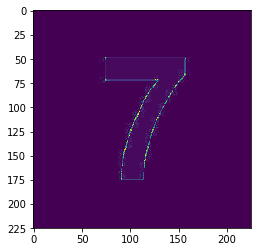

[7]


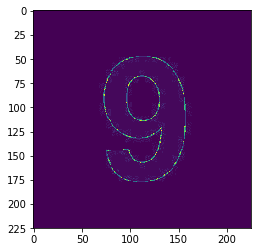

[9]


In [24]:
for index, image_histogram in enumerate(test):
    figure(index)
    imshow(array(Image.open(test_filepath[index])))
    show()
    print(knn.predict([image_histogram]))